Epoch 1, Training Accuracy: 0.75, Validation Accuracy: 0.7653631284916201
Epoch 2, Training Accuracy: 0.7907303370786517, Validation Accuracy: 0.8156424581005587
Epoch 3, Training Accuracy: 0.8019662921348315, Validation Accuracy: 0.8212290502793296
Epoch 4, Training Accuracy: 0.8033707865168539, Validation Accuracy: 0.8324022346368715
Epoch 5, Training Accuracy: 0.8061797752808989, Validation Accuracy: 0.8268156424581006
Epoch 6, Training Accuracy: 0.800561797752809, Validation Accuracy: 0.8100558659217877
Epoch 7, Training Accuracy: 0.8047752808988764, Validation Accuracy: 0.8100558659217877
Epoch 8, Training Accuracy: 0.8061797752808989, Validation Accuracy: 0.8100558659217877
Epoch 9, Training Accuracy: 0.8103932584269663, Validation Accuracy: 0.8044692737430168
Epoch 10, Training Accuracy: 0.8075842696629213, Validation Accuracy: 0.8044692737430168
Epoch 11, Training Accuracy: 0.8061797752808989, Validation Accuracy: 0.8100558659217877
Epoch 12, Training Accuracy: 0.80898876404494

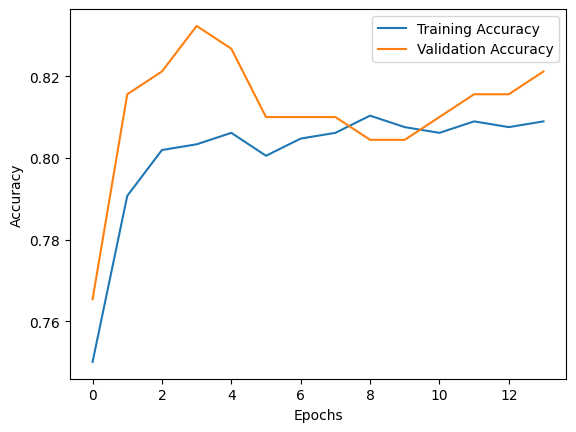

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Preprocessing
titanic_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_df.fillna(titanic_df.mean(), inplace=True)

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Augmented Data
X_augmented = X_train + np.random.normal(0, 0.1, X_train.shape)

# Noisy Data
X_noisy = X_train + np.random.normal(0, 0.1, X_train.shape)

# Shuffle data
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Early stopping parameters
best_val_accuracy = -float('inf')
best_model = None
patience = 10
epochs_without_improvement = 0

# Model parameters
hidden_layer_sizes = (100, 50)
alpha = 0.0001  # L1 and L2 regularization parameter

# Train the model with early stopping
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      activation='relu',
                      alpha=alpha,
                      solver='adam',
                      random_state=42)

train_accuracy_history = []
val_accuracy_history = []

for epoch in range(1000):
    model.partial_fit(X_train_shuffled, y_train_shuffled, classes=np.unique(y_train))
    
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_history.append(train_accuracy)

    # Calculate validation accuracy
    y_val_pred = model.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    val_accuracy_history.append(val_accuracy)

    print(f"Epoch {epoch + 1}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    # Early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print("Early stopping triggered.")
            break

# Final evaluation on test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

# Plot training and validation accuracy
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
